In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* first we standardize our dataset so our mean will be 0 and variance would be 1
* after standardization we get the covariance-matrix..
* from the covariance matrix we find our eigen-values and eigen-vector
* top eigen values correspond to eigen vectors and these vectors explain maximum variance so we select those only

In [3]:
train.shape

(42000, 785)

In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.shape

(28000, 784)

In [6]:
# save the labels into a variable
label = train['label']

# Drop the label feature and store the pixel data
data = train.drop("label", axis=1)

In [7]:
print(data.shape)
print(label.shape)

(42000, 784)
(42000,)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


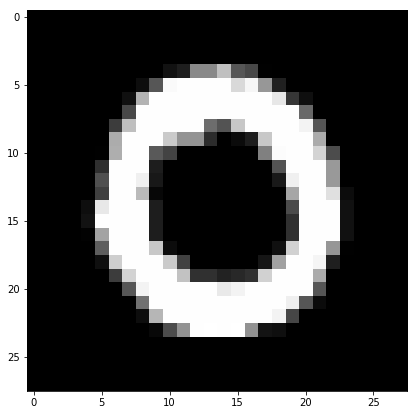

0


In [8]:
# display or plot a number
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(7,7))
idx = 1

grid_data = data.iloc[idx].as_matrix().reshape(28, 28)
plt.imshow(grid_data, interpolation="none", cmap="gray")
plt.show()

print(label[idx])

What is Dimensionality Reduction?

Dimensionality reduction is simply, the process of reducing the dimension of your feature set. 

PCA (Principal Component Analysis) : Popularly used for dimensionality reduction in continuous data, PCA rotates and projects data along the direction of increasing variance. The features with the maximum variance are the principal components.


**2D Visualization using PCA**

we should standardized the variables before applying PCA because it will give more emphasis to those variables having higher variances than to those variables with very low variances while identifying the right principle component.

In [9]:
#before doing dimensionality reduction we must perform data-preprocessing for better understandable format
#We can utilise Eigenvalues and Eigenvectors to reduce the dimension space
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(42000, 784)


a covariance matrixa is a square matrix giving the covariance between each pair of elements of a given random vector. In the matrix diagonal there are variances, i.e., the covariance of each element with itself.

“Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables

In [10]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)


print("the shape of co-variance matrix= ", covar_matrix.shape)


the shape of co-variance matrix=  (784, 784)


In [11]:
#eigenvector does not change direction in a transformation
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh


# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
#top eigen values 

values, vectors = eigh(covar_matrix, eigvals=(782, 783))


print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [12]:
# projecting the original data  on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


In [13]:
import pandas as pd

#appending label to the 2nd projected data
new_coordinates = np.vstack((new_coordinates, label)).T

#creating a new data frame for ploting the labeled points
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


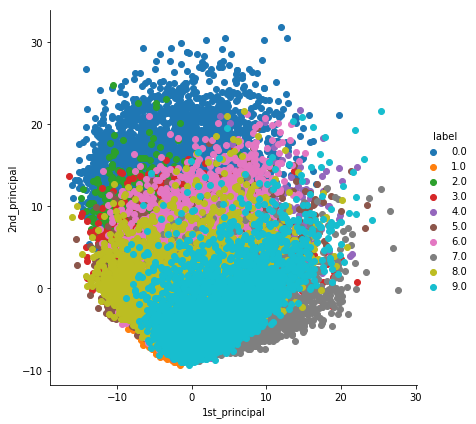

In [14]:
#ploting the 2d data points with seaborn
import seaborn as sns
sns.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()
#overlapping is lot and pca does not do good job
#tsne does a lot better 

* features that explain the maximum variance are principal components or eigen-vectors
* we select only top eigen-vectors and discard whatever left
* it tries to save global structure
* it tries to find the direction and project old points into that direction which explain maximum variance(spread)
* its good for linear shape 
* interpretability not good can get messy with multiple dimensions works fine with less dimensions
* does not create new features

# ** PCA using Scikit-Learn**

In [15]:
#initializing the pca

from sklearn import decomposition
pca = decomposition.PCA()

In [16]:
#configuring the parameters
#the number of components = 2

pca.n_components = 2
pca_data=  pca.fit_transform(sample_data)

#pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape", pca_data.shape)

shape of pca_reduced.shape (42000, 2)


In [17]:
import warnings
warnings.filterwarnings("ignore")

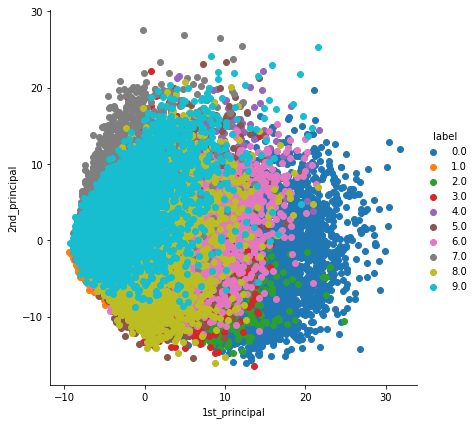

In [18]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, label)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()
#just as same its kinda slighlty rotated 90 degrees

** PCA for dimensionality redcution**

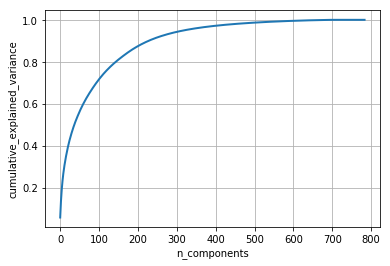

In [19]:
#pca for dimensionality reduction (not for visulaization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

#nothing but eigen values
percentage_var_explained = pca.explained_variance_/ np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

#plot the pca spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative_explained_variance')
plt.show()

#if we take 200-dimesions , approx . 90% of variance is explained

**What is t-SNE?**

t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data

* it tries to save local structure rather then global structure 
* tsne tries to find nearest points or neighbours in both dimesions in high and low and try to embed in lower dimension (uses gaussian in high and cauchy in lower)
* it uses probability for finding similar points (neighbors)
* its much better for non-linear shapes 
* not very interpretable, must run multiple times, random shapes don't mean nothing , perplexity is like neighbours
* can take a lot of time to run
* clusters are not interpretable 
* it create new features from old ones

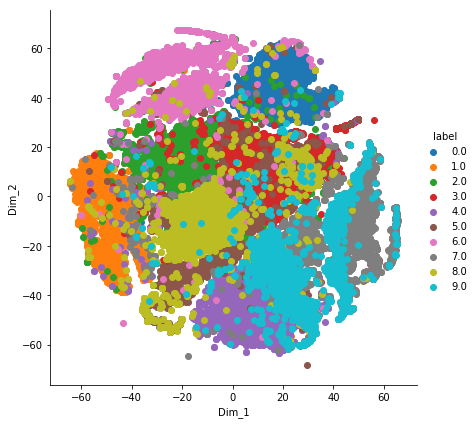

In [20]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2

tsne_data=  model.fit_transform(sample_data)

tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(tsne_data, columns = ("Dim_1", "Dim_2", "label"))

#plotting the result of tsne
sns.FacetGrid(tsne_df, hue='label', size=6).map(plt.scatter, "Dim_1", 'Dim_2').add_legend()
plt.show()

in t-sne we should always try for multiple perplexity and multiple iteration until its not get properly stable shape so